In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [110]:
course_rec_sys = 'courseRecSys.xlsx'

In [111]:
df = pd.read_excel(course_rec_sys,
header=0,
index_col=False,
keep_default_na=True
)

In [112]:
df.head()

,ID,Start time,Completion time,Email,Name,Name(not mandatory)\n,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,6,2023-01-30 14:04:19,2023-01-30 14:05:54,anonymous,NaN,NaN,0.30,0.85,0.85,0.90,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,7,2023-01-30 14:04:44,2023-01-30 14:12:35,anonymous,NaN,Rahul Jain,0.70,0.80,0.20,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,8,2023-01-30 14:11:07,2023-01-30 14:12:47,anonymous,NaN,NaN,0.70,0.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,9,2023-01-30 19:10:54,2023-01-30 19:12:35,anonymous,NaN,Adrij Sharma,0.65,0.70,0.20,0.75,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,10,2023-01-30 22:58:02,2023-01-30 23:00:34,anonymous,NaN,NaN,0.70,0.60,0.20,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
df=df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)


In [114]:
# df.rename(columns = {'Name(not mandatory)\n':'Name'}, inplace = True)

In [115]:
df=df.replace(np.nan, 0)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.8,0.0
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
124,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.5,1.0,...,0.5,0.5,0.5,0.5,0.5,0.8,0.8,1.0,1.0,1.0
125,1.00,0.30,1.00,0.60,0.70,0.70,0.60,0.70,0.8,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.4,0.6,0.3
126,0.90,0.70,0.80,0.10,0.80,1.00,1.00,1.00,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
courses = df.columns
courses

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [117]:
# courses = ['Data Structures and Algorithms','Computer Architecture\n','Discrete Mathematics\n','Economics','Programming-2','Machine Learning\n','Mathematics For Machine Learning\n','Visual Recognition\n','Natural Language Processing\n','Reinforcement Learning','Digital CMOS VLSI Design ','System design with FPGA ','ASIC design ','VLSI Architecture Design\n','High level synthesis and optimization of Digital Circuits ','Digital Sociology ','Privacy in the Digital Age','Techno-economics of networks ','Technology Ethics and AI ','The Web and the Mind ']

In [118]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit_predict(df[courses])    

array([1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1], dtype=int32)

In [119]:
wcss = []  #Within Cluster Sum of Squares
for number_of_clusters in range(1, 15): 
    kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
    kmeans.fit(df[courses]) 
    wcss.append(kmeans.inertia_)
wcss

[384.27919086801313,
 305.37930082755076,
 279.87335670064067,
 258.5072128210544,
 242.26198355687313,
 228.8322811528604,
 216.63348319177484,
 210.41658817517876,
 202.18946548761318,
 191.62531055126362,
 183.12788534994922,
 180.28565848276975,
 173.70153107900313,
 168.96804704193178]

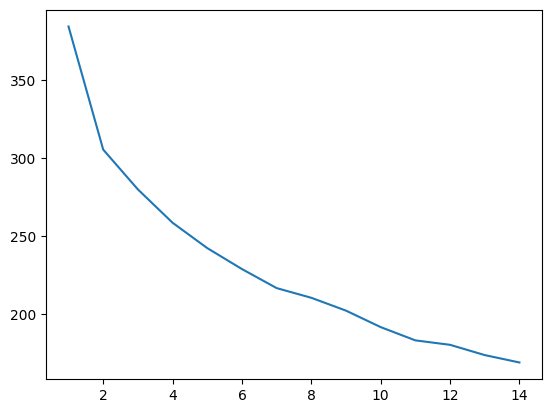

In [120]:
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10,11,12,13,14]
plt.plot(ks, wcss)

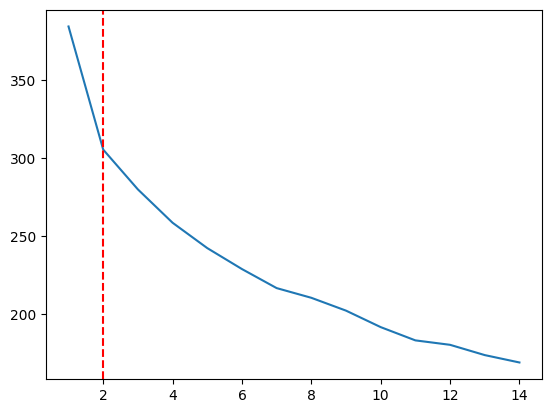

In [121]:
ks = [1, 2, 3, 4, 5 , 6 , 7 , 8, 9, 10,11,12,13,14]
plt.plot(ks, wcss);
plt.axvline(2, linestyle='--', color='r')

In [122]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit_predict(df[courses]) 

array([3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 2, 1, 3, 3, 3, 2, 1, 3, 2, 3, 1, 3, 3, 3, 1, 1, 2,
       3, 4, 2, 4, 2, 1, 4, 1, 2, 2, 1, 3, 2, 4, 3, 1, 1, 3, 0, 4, 2, 2,
       4, 2, 1, 0, 4, 3, 1, 3, 1, 2, 4, 1, 4, 2, 2, 3, 3, 0, 2, 3, 4, 1,
       1, 2, 1, 2, 3, 3, 2, 1, 2, 3, 3, 4, 3, 2, 2, 2, 3, 2, 1, 1, 2, 4,
       0, 2, 4, 4, 1, 3, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 4], dtype=int32)

In [123]:
kmeans.cluster_centers_

array([[ 1.00000000e+00,  1.00000000e+00,  8.75000000e-01,
         3.75000000e-01,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  5.62500000e-01,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  2.50000000e-01,
         6.25000000e-01,  6.87500000e-01,  5.00000000e-01,
         1.00000000e+00,  8.75000000e-01,  8.75000000e-01,
         1.00000000e+00,  1.00000000e+00,  2.50000000e-01,
         2.50000000e-01,  2.50000000e-01,  0.00000000e+00,
         1.87500000e-01],
       [ 7.72000000e-01,  7.08000000e-01,  6.06000000e-01,
         7.44000000e-01,  8.08000000e-01,  8.12000000e-01,
         6.40000000e-01,  6.36000000e-01,  6.48000000e-01,
         6.08000000e-01,  7.24000000e-01,  5.14000000e-01,
         6.48000000e-01,  5.50000000e-01,  6.60000000e-01,
         2.64000000e-01,  2.80000000e-01,  2.40000000e-01,
         2.00000000e-01,  2.28000000e-01,  4.48000000e-01,
         6.38400000e-01,  6.61200000e-01,  7.18000000e-01,
         7.56000000e-01],
    